##                                      _Loan Defaulter Prediction Model_

### Steps Involved

1. Understanding Business Problems<br>

2. Map it to Machine Learning problem<br>

3. Data Preparation:<br>
> a. Feature Selection<br>
> b. Data Cleaning and Encoding<br>
> c. Missing values Treatment and imputation<br>
> d. Handling Outliers<br>
> e. Multicolinearity Check<br>
   
4. Exploratory Data Analysis<br>
   a. Univariate and Bi-variate Data Analysis<br>
   
5. Classification Model Designing(Losistic Regression, SVM, Naive Bayes, Decision Tree and Random Forest)<br>

5. Evaluating model Accuracy and comparision<br> 

6. Make Predictions<br>

7. Conclusion

#### This project is to analyze different potential borrowers data. The goal of this project is to build a model predicting the loan default of potential borrowers.

#### Feature Description 

#### Input Features are:
     
> 1. Monthly Net Income
> 2. Paycheck Net Income 
> 3. Rent or Own
> 4. Months at Residence
> 5. Bank Account Months 
> 6. Pay Cycle
> 7. Loan Amount
> 8. Adv Payment Days (Derived column from Loan Funded Date and Loan Due Date)

#### Output Featue

> 1. First Payment Default

### Import Required Libaries

In [3]:
import numpy as np                                   # Numpy will be used for mathematical calculation
import pandas as pd                                  # Pandas will be used for data manipulation and extraction
import matplotlib.pyplot as plt                      # Matplot and seaborn will be used for data visualization
import seaborn as sns
%matplotlib inline                                   

from sklearn.ensemble import RandomForestClassifier  # For Random Forest Classification
from sklearn.neighbors import KNeighborsClassifier   # For KNN Classification
from sklearn.metrics import accuracy_score,roc_auc_score,confusion_matrix,classification_report # To Check the accuracy of the Model
from sklearn import preprocessing                    # Used for Standardization of features
from sklearn.preprocessing import StandardScaler     # Used for Standardization of features
from sklearn.preprocessing import RobustScaler       # For Scaling or Standardization of Features
from sklearn.model_selection import train_test_split # For Training and Testing Data set Splitting
from sklearn.linear_model import LogisticRegression  # For Logistic Classification
from xgboost import XGBClassifier                    # For eXtreme Gradient Boosting Decision Tree
from lightgbm import LGBMClassifier                  # Gradient Boosting
from sklearn.naive_bayes import GaussianNB           # For Gussian Niave Bayes Classification
import warnings
warnings.filterwarnings('ignore')                    # Ignore Warning Messages
import scikitplot as skplt
from sklearn.metrics import roc_curve                # For ROC-AUC Curve
from sklearn.model_selection import cross_val_score  # For Cross Validation Technique

### Data Preparation

In [652]:
# Load the Train Data set to pandas data frame
data_train=pd.read_csv('C:\\Users\\Anup\\Desktop\\DataSet\\newdata\\data.csv',sep=',')

#Display 10 random observations of the data set
data_train.sample(10)

#Diplay 1st and last 5 observations of the Data set
#data_train.head()
#data_train.tail()

,SetID,Time of Application,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,Loan Funded Date,Loan Due Date,First Payment Default
212,168,2018-04-05T14:35:22Z,CA,3000,1500,R,96,30,BiMonthly,235.30,05-04-2018,20-04-2018,False
42,1459,2018-02-21T09:45:59Z,CA,1714,857,R,42,36,BiMonthly,300.00,21-02-2018,06-03-2018,True
598,998,2018-03-09T16:06:34Z,TX,1500,1500,R,72,6,Monthly,643.42,09-03-2018,03-04-2018,False
1385,1485,2018-02-20T13:58:56Z,TX,10600,5300,R,60,60,BiWeekly,642.32,20-02-2018,09-03-2018,True
1365,1067,2018-03-07T06:43:30Z,CA,1500,1500,R,108,6,Monthly,117.65,07-03-2018,03-04-2018,False
710,444,2018-03-28T13:56:36Z,TX,3500,3500,R,36,6,Monthly,256.71,28-03-2018,10-04-2018,False
695,1402,2018-02-22T18:39:43Z,CA,4004,2002,R,36,36,BiMonthly,300.00,22-02-2018,15-03-2018,False
1006,298,2018-04-02T15:41:08Z,TX,1500,1500,R,12,6,Monthly,643.97,02-04-2018,01-05-2018,True
448,15,2018-04-09T17:24:33Z,CA,3000,1500,R,24,60,BiWeekly,117.65,09-04-2018,20-04-2018,False
646,468,2018-03-27T23:21:51Z,CA,3264,816,O,29,36,Weekly,300.00,28-03-2018,06-04-2018,False


In [653]:
#Check the features of the data set
print(f"Data set featues:\n{40 * '*'}")
data_train.columns

Data set featues:
****************************************


Index(['SetID', 'Time of Application', 'State', 'Monthly Net Income',
       'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Loan Funded Date',
       'Loan Due Date', 'First Payment Default'],
      dtype='object')

In [654]:
# Create a derive column Loan Percentage(Loan Amount/Paycheck Net Income)
loan_percent = data_train['Loan Amount'] / data_train['Paycheck Net Income']

In [655]:
data_train['loan_percent'] = loan_percent

In [656]:
#Calculate no of days between Loan Due Date and Loan Funded Date
days = (pd.to_datetime(data_train['Loan Due Date']) - pd.to_datetime(data_train['Loan Funded Date'])).dt.days

In [657]:
#Appended the derived column to the existing Data Frame
data_train['Adv Payment Days']=days

In [658]:
#Eliminate the insignificant features from the data set
del_cols = ['SetID', 'Time of Application', 'Loan Funded Date', 'Loan Due Date']
data_train = data_train.drop(labels = del_cols, axis = 1) 

In [659]:
#Check the features of the data set after eliminating insignificant features
print(f"Data set featues:\n{40 * '*'}")
data_train.columns

Data set featues:
****************************************


Index(['State', 'Monthly Net Income', 'Paycheck Net Income', 'Rent or Own',
       'Months at Residence', 'Bank Account Months', 'Pay Cycle',
       'Loan Amount', 'First Payment Default', 'loan_percent',
       'Adv Payment Days'],
      dtype='object')

### Data Transformation or Encoding of Categorical Features

In [660]:
#Check the unique values of all the categorical variables
print(f"Check unique values of the features:\n{40 * '*'}")
print("unique values in Pay Cycle variable :", pd.unique(data_train['Pay Cycle']),"\n")
print("unique values in Rent or Own variable:",pd.unique(data_train['Rent or Own']),"\n")
print("unique values in First Payment Default variable:",pd.unique(data_train['First Payment Default']),"\n")
print("unique values in State variable:",pd.unique(data_train['State']))

Check unique values of the features:
****************************************
unique values in Pay Cycle variable : ['Monthly' 'Weekly' 'BiWeekly' 'BiMonthly'] 

unique values in Rent or Own variable: ['R' 'O'] 

unique values in First Payment Default variable: [False  True] 

unique values in State variable: ['CA' 'TX']


In [661]:
# Change the Data types of the variables to categorical and numeric
data_train['Rent or Own']= data_train['Rent or Own'].astype('category')
data_train['Pay Cycle']= data_train['Pay Cycle'].astype('category')
data_train['First Payment Default']= data_train['First Payment Default'].astype('int')
data_train['State']= data_train['State'].astype('category')

In [662]:
#Replace the categorical values with integet values for the featare Pay cycle and Rent or Own
encoding_cat = {"Pay Cycle": {'Weekly':1, 'BiWeekly':2, 'Monthly':3,'BiMonthly':4},
               "Rent or Own":  {"R": 1, "O": 0},
               "State":  {"CA": 1, "TX": 0},}
data_train.replace(encoding_cat, inplace=True)

In [663]:
#Check the unique values of these features
print(f"Check unique values of the features:\n{40 * '*'}")
print("unique values in Pay Cycle variable :", pd.unique(data_train['Pay Cycle']),"\n")
print("unique values in Rent or Own variable:",pd.unique(data_train['Rent or Own']),"\n")
print("unique values in First Payment Default variable:",pd.unique(data_train['First Payment Default']),"\n")
print("unique values in State variable:",pd.unique(data_train['State']))

Check unique values of the features:
****************************************
unique values in Pay Cycle variable : [3 1 2 4] 

unique values in Rent or Own variable: [1 0] 

unique values in First Payment Default variable: [0 1] 

unique values in State variable: [1 0]


In [664]:
#Print No of Defaulter and Non Defaulter Values
print(f"Count of defaulter and Non-Defaulter values(1-Defaulter,0-Non Defaulter) :\n{40 * '*'}")
data_train['First Payment Default'].value_counts()

Count of defaulter and Non-Defaulter values(1-Defaulter,0-Non Defaulter) :
****************************************


0    1175
1     425
Name: First Payment Default, dtype: int64

In [665]:
#Check shape of the Data(No. of obervations and Features in the data set)
print(f"Shape of the Data(Observations, Features):\n{40 * '*'}")
print(f"{data_train.shape}\n")

#Check Data Types of the Data
print(f"Data types:\n{40 * '*'}")
print(f"{data_train.dtypes}\n")

Shape of the Data(Observations, Features):
****************************************
(1600, 11)

Data types:
****************************************
State                      int64
Monthly Net Income         int64
Paycheck Net Income        int64
Rent or Own                int64
Months at Residence        int64
Bank Account Months        int64
Pay Cycle                  int64
Loan Amount              float64
First Payment Default      int32
loan_percent             float64
Adv Payment Days           int64
dtype: object



In [666]:
#Check data frame information like No of entries, no of null observation, data types, memory usages. 
print(f"Data Frame Information:\n{40 * '*'}")
data_train.info()

Data Frame Information:
****************************************
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1600 entries, 0 to 1599
Data columns (total 11 columns):
State                    1600 non-null int64
Monthly Net Income       1600 non-null int64
Paycheck Net Income      1600 non-null int64
Rent or Own              1600 non-null int64
Months at Residence      1600 non-null int64
Bank Account Months      1600 non-null int64
Pay Cycle                1600 non-null int64
Loan Amount              1600 non-null float64
First Payment Default    1600 non-null int32
loan_percent             1600 non-null float64
Adv Payment Days         1600 non-null int64
dtypes: float64(2), int32(1), int64(8)
memory usage: 131.3 KB


In [667]:
#Display statistical summary of continuos variables like measure of central tendency, range and measure of dispersion 
print(f"statistical summary of continuos variables:\n{40 * '*'}")
print(f"25%, 50% and 75% are the percentile values\n"
      f"25% - will be calculated as min+(max-min)*25%(percentile)\n"
      f"50% - will be calculated as min+(max-min)*50%(percentile)\n"
      f"75% - will be calculated as min+(max-min)*75%(percentile)\n{40 * '*'}")

data_train.describe().transpose()

statistical summary of continuos variables:
****************************************
25%, 50% and 75% are the percentile values
25% - will be calculated as min+(max-min)*25%(percentile)
50% - will be calculated as min+(max-min)*50%(percentile)
75% - will be calculated as min+(max-min)*75%(percentile)
****************************************


,count,mean,std,min,25%,50%,75%,max
State,1600.0,0.724375,0.446968,0.000000,0.000000,1.000000,1.00000,1.000000
Monthly Net Income,1600.0,4362.641250,5524.868265,70.000000,2000.000000,3200.000000,5139.00000,184000.000000
Paycheck Net Income,1600.0,2718.488750,4894.909919,70.000000,1250.000000,2100.000000,3500.00000,184000.000000
Rent or Own,1600.0,0.878750,0.326520,0.000000,1.000000,1.000000,1.00000,1.000000
Months at Residence,1600.0,63.285625,70.777592,0.000000,17.000000,39.000000,81.00000,690.000000
Bank Account Months,1600.0,24.731250,23.414134,3.000000,6.000000,24.000000,36.00000,410.000000
Pay Cycle,1600.0,2.548125,0.794877,1.000000,2.000000,2.000000,3.00000,4.000000
Loan Amount,1600.0,317.974619,176.993218,117.650000,235.300000,300.000000,320.59250,644.240000
First Payment Default,1600.0,0.265625,0.441804,0.000000,0.000000,0.000000,1.00000,1.000000
loan_percent,1600.0,0.184952,0.160926,0.003492,0.078433,0.128684,0.25331,1.680714


### Checking Missing values or NaN values

In [668]:
#Check Null valuesor missing Values(NaN) in the data set
print(f"Sum of null values in each feature:\n{35 * '*'}")
print(f"{data_train.isnull().sum()}")

print(f"\n There is no NaN or Null values in the data set")

Sum of null values in each feature:
***********************************
State                    0
Monthly Net Income       0
Paycheck Net Income      0
Rent or Own              0
Months at Residence      0
Bank Account Months      0
Pay Cycle                0
Loan Amount              0
First Payment Default    0
loan_percent             0
Adv Payment Days         0
dtype: int64

 There is no NaN or Null values in the data set


### Count Plots for Defaulters and Non-Defaulters

Defaulters = 425
Non-Defaulters = 1175
Proportion of defaulters to Non defaulters = 36.17%


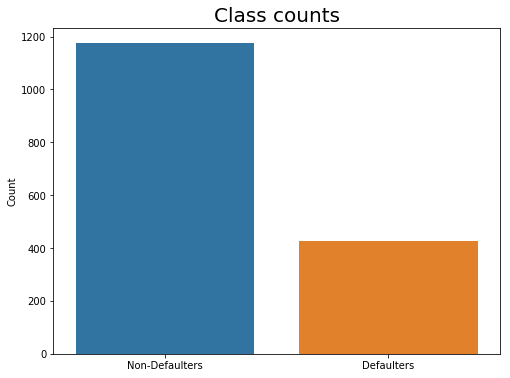

In [669]:
# Get number of defaulter and Non-Defaulter examples

df = data_train[data_train['First Payment Default'] == 1].shape[0]

ndf = data_train[data_train['First Payment Default'] == 0].shape[0]

print(f"Defaulters = {df}")

print(f"Non-Defaulters = {ndf}")

print(f"Proportion of defaulters to Non defaulters = {(df / ndf) * 100:.2f}%")

plt.figure(figsize=(8, 6))

sns.countplot(data_train['First Payment Default'])

plt.xticks((0, 1), ["Non-Defaulters", "Defaulters"])

plt.xlabel("")

plt.ylabel("Count")

plt.title("Class counts", y=1, fontdict={"fontsize": 20});

#### This Data set is pretty imbalanced, as there is significant difference in no. of defaulters and Non-Defaulters value.

### Perform Uni-variate/Bi-variate analysis

In [670]:
#Display Co-relation Matrix between the features
print(f"Pearson Correlation Matrix:\n{35 * '*'}")
data_train.corr(method ='pearson')

Pearson Correlation Matrix:
***********************************


,State,Monthly Net Income,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default,loan_percent,Adv Payment Days
State,1.000000,-0.193677,-0.162404,0.045117,0.055095,-0.019691,-0.095541,-0.831175,-0.116733,-0.090396,-0.059471
Monthly Net Income,-0.193677,1.000000,0.936308,-0.016210,-0.030648,0.069021,-0.025316,0.179618,0.082547,-0.283633,-0.001937
Paycheck Net Income,-0.162404,0.936308,1.000000,-0.067523,0.000516,0.045390,0.082779,0.148856,0.068984,-0.234768,-0.033247
Rent or Own,0.045117,-0.016210,-0.067523,1.000000,-0.345370,0.062895,-0.061839,-0.072573,-0.023708,-0.014774,0.039421
Months at Residence,0.055095,-0.030648,0.000516,-0.345370,1.000000,0.166267,0.007976,0.046890,-0.028628,0.105101,0.010422
Bank Account Months,-0.019691,0.069021,0.045390,0.062895,0.166267,1.000000,0.013263,0.125348,-0.037772,0.023654,0.078224
Pay Cycle,-0.095541,-0.025316,0.082779,-0.061839,0.007976,0.013263,1.000000,0.077226,-0.015944,-0.228341,-0.059189
Loan Amount,-0.831175,0.179618,0.148856,-0.072573,0.046890,0.125348,0.077226,1.000000,0.126960,0.260353,0.080009
First Payment Default,-0.116733,0.082547,0.068984,-0.023708,-0.028628,-0.037772,-0.015944,0.126960,1.000000,-0.005362,0.040514
loan_percent,-0.090396,-0.283633,-0.234768,-0.014774,0.105101,0.023654,-0.228341,0.260353,-0.005362,1.000000,0.034665


#### Pearson Correlation Coefficient (r) is thell the strength and direction of linear relationship between 2 continuous variables. Its value ranges between -1 to 1. If "r" value is -1 or 1 then 2 variables are strongly correlated with each other, if value is zero then there is no correlation between both the variables. 

### Multivariate Plots
#### Correlation Matrix Plot

Heat-Map of Correlation Matrix using matplot package:
**************************************************


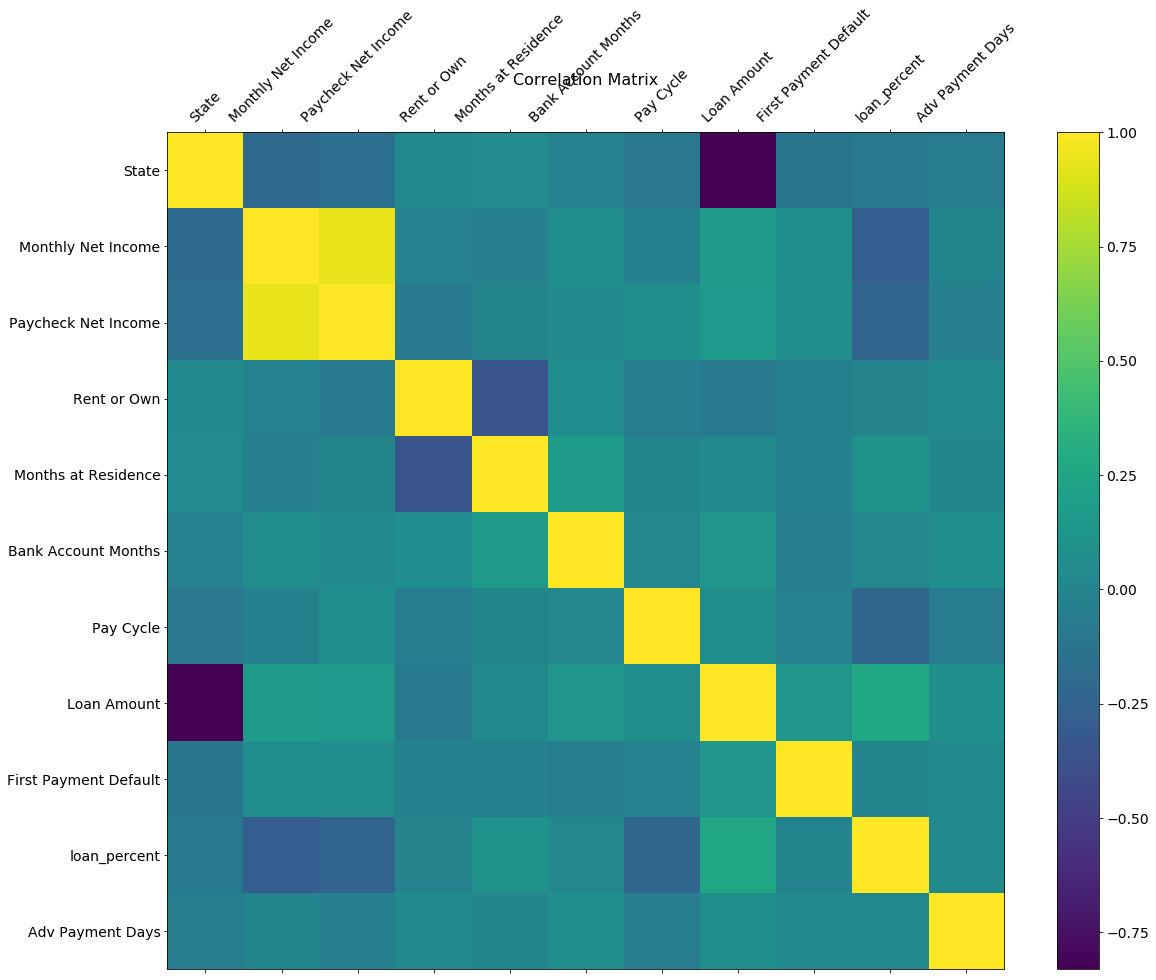

In [671]:
#Heat-Map using matplot package
print(f"Heat-Map of Correlation Matrix using matplot package:\n{50 * '*'}")
f = plt.figure(figsize=(19, 15))
plt.matshow(data_train.corr(), fignum=f.number)
plt.xticks(range(data_train.shape[1]), data_train.columns, fontsize=14, rotation=45)
plt.yticks(range(data_train.shape[1]), data_train.columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

Heat-Map of Correlation Matrix using Seaborn package:
**************************************************


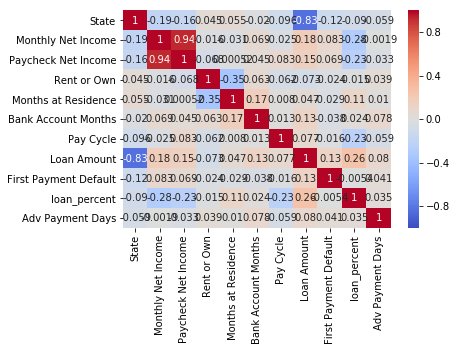

In [672]:
#Heat-Map Correlation Matrix using Seaborn Package
print(f"Heat-Map of Correlation Matrix using Seaborn package:\n{50 * '*'}")
sns.heatmap(data_train.corr(), annot = True, vmin=-1, vmax=1, center= 0, cmap= 'coolwarm')

#### Here we can see "Monthly Net Income" and "PayCheck Net Income" are strongly correlated so we can drop "Monthly Net Income" feature for the data set to avoid multi collnearity problem 

In [673]:
# Deleting In-Significant Columns
data_train = data_train.drop(['Monthly Net Income'], axis=1)
#data_train = data_train.drop(['Paycheck Net Income'], axis=1)
#data_train = data_train.drop(['Loan Amount'], axis=1)
data_train = data_train.drop(['Adv Payment Days'], axis=1)

In [674]:
data_train.columns

Index(['State', 'Paycheck Net Income', 'Rent or Own', 'Months at Residence',
       'Bank Account Months', 'Pay Cycle', 'Loan Amount',
       'First Payment Default', 'loan_percent'],
      dtype='object')

### Scatterplot Matrix

#### PairPlot: A pairs plot allows us to see both distribution of single variables and relationships between two variables.The pairs plot builds on two basic figures, the histogram and the scatter plot. The histogram on the diagonal allows us to see the distribution of a single variable while the scatter plots on the upper and lower triangles show the relationship between two variables.

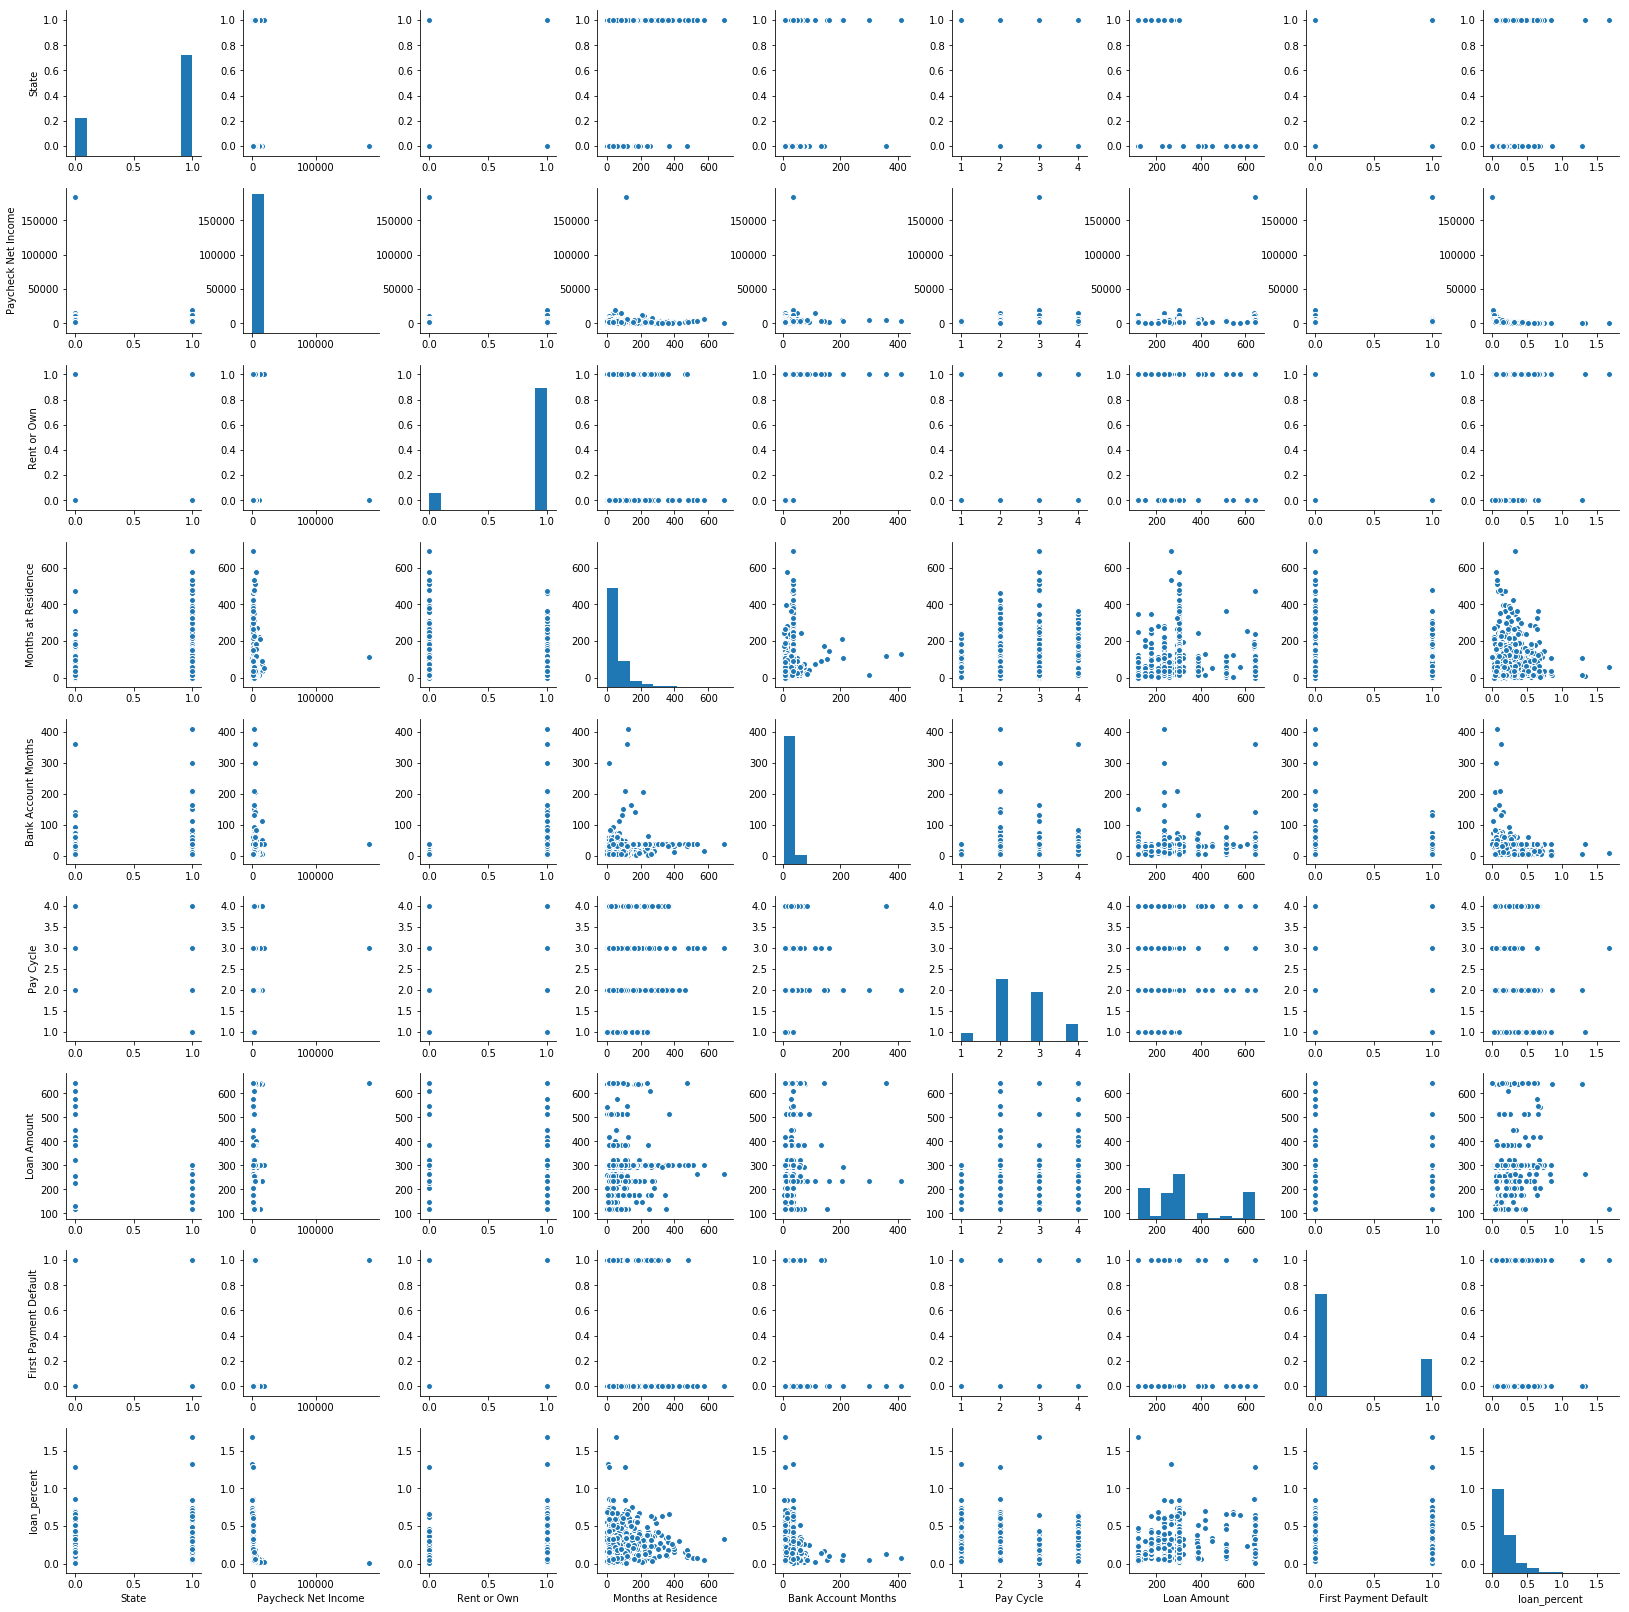

In [675]:
sns.pairplot(data_train, kind="scatter")
plt.show()

### Univariate Plots

#### Histogram: Histograms group data into bins and provide you a count of the number of observations in each bin. From the shape of the bins you can quickly get a feeling for whether an attribute is Gaussian’, skewed or even has an exponential distribution. It can also help you see possible outliers.

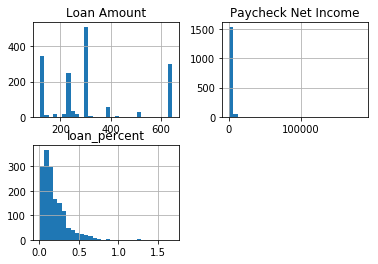

In [676]:
data_train[['Paycheck Net Income', 'Loan Amount','loan_percent']].hist(bins=30)
plt.show()

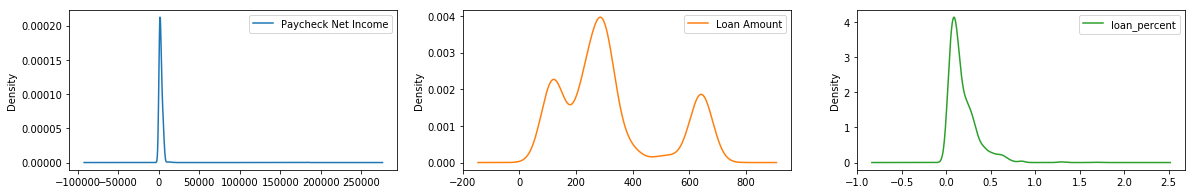

In [677]:
#DensiTy Plot Density plots are another way of getting a quick idea of the distribution of each attribut
data_train[['Paycheck Net Income', 'Loan Amount','loan_percent']].plot(kind='density', subplots=True, layout=(3,3), sharex=False,figsize=(20, 10))
plt.show()

#### Boxplot: Boxplots summarize the distribution of each attribute, drawing a line for the median (middle value) and a box around the 25th and 75th percentiles (the middle 50% of the data). The whiskers give an idea of the spread of the data and dots outside of the whiskers show candidate outlier values (values that are 1.5 times greater than the size of spread of the middle 50% of the data).

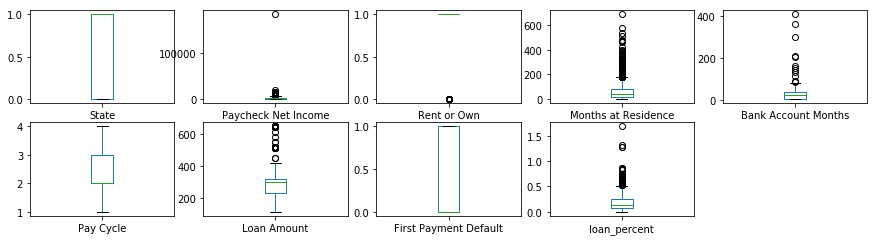

In [678]:
#Box and Whisker Plots
data_train.plot(kind='box', subplots=True, layout=(5,5), sharex=False, sharey=False,figsize=(15, 10))
plt.show()

Rent House means '1' and Own House is '0'


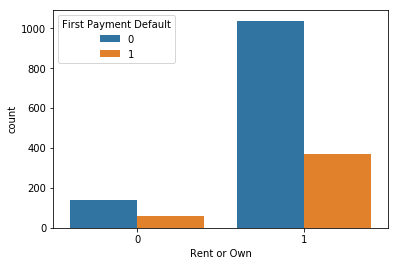

In [679]:
#Plot count of Defaulter and Non-Defaulter Based on Rented or own house
print("Rent House means '1' and Own House is '0'")
sns.countplot(x='Rent or Own',hue='First Payment Default',data=data_train)
sns.countplot
plt.show()

#### Data Standardization: Standardization refers to shifting the distribution of each attribute to have a mean of zero and a standard deviation of one (unit variance).

In [79]:
# Scaling
# scaler=StandardScaler()
# data_train[['Paycheck Net Income', 'Rent or Own', 'Months at Residence','Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Adv Payment Days']]=scaler.fit_transform(data_train[['Paycheck Net Income', 'Rent or Own', 'Months at Residence','Bank Account Months', 'Pay Cycle', 'Loan Amount', 'Adv Payment Days']])

### Partitioning and Splitting the data set:

#### As Data Set having imbalanced features,stratify sampling can be used to divide the sample into multiple groups, each group having imilar features, then it will use SRS(Simple Random Sampling) technique so that each individual data points are equal chnace of being selected.

In [680]:
#Patition Data sets into attributes and lebels
X=data_train.drop(['First Payment Default'],axis=1)
Y=data_train['First Payment Default']

#Prepare Data set for training and testing with 80 and 20 percentage
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.20,random_state=42,stratify=Y)

In [681]:
#Print the shape of the training and Test Data sets after partition
print(f"shape of the training and Test Data sets after partition:\n{40 * '*'}")
print("Shape of x_train:", x_train.shape,"\n")
print("Shape of x_test:", x_test.shape,"\n")
print("Shape of y_train:", y_train.shape,"\n")
print("Shape of y_test:", y_test.shape)

shape of the training and Test Data sets after partition:
****************************************
Shape of x_train: (1280, 8) 

Shape of x_test: (320, 8) 

Shape of y_train: (1280,) 

Shape of y_test: (320,)


#### Robust Scalar which scales the data in the inter quantile range (IQR) and ignore the effect of the outliers

In [682]:
#Scaling
scaler=RobustScaler()
x_train=scaler.fit_transform(x_train)
x_train=pd.DataFrame(x_train,columns=X.columns)

x_test=scaler.fit_transform(x_test)
x_test=pd.DataFrame(x_test,columns=X.columns)

#### Balancing Data Set. As per below value majority class (0) 73% and Minority Class (1) 26%. SO we need balance the dataset either by Up sampling the minority class or Down sampling the majority class But as the dataset is too small, Down sampling the majority class will not help, so we will Up sample the Minority Class. All resampling operations have to be applied to only training datasets.parameter class_weight does the same thing.

In [683]:
Y.value_counts(normalize=True)

0    0.734375
1    0.265625
Name: First Payment Default, dtype: float64

#### In the Training Data set 340 observations are defaulter and 940 observations are Non-Defaulter,so data is highly imbalance

In [684]:
y_train.value_counts()

0    940
1    340
Name: First Payment Default, dtype: int64

### Modeling
> 1. Logistic Regression
> 2. Support Vector Machine
> 3. Decision Tree
> 4. Random Forest
> 5. KNN (K-Nearest Neighbor)
> 6. Niave Bayes
> 7. Gradiant Boosting Classification

#### Logistic Regression Classifier:

In [685]:
import sklearn.metrics as metrics
# instantiate the model (using the default parameters)
logreg = LogisticRegression()
# fit the model with data
logreg.fit(x_train, y_train)

# store the predicted response values
y_pred = logreg.predict(x_test)

# check how many predictions were generated
len(y_pred)

print("Model Accuracy is : ", metrics.accuracy_score(y_test, y_pred)*100)

Model Accuracy is :  73.4375


[[235   0]
 [ 85   0]]


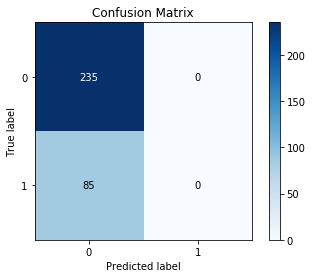

In [686]:
print(confusion_matrix(y_test, y_pred))
skplt.metrics.plot_confusion_matrix(y_test, y_pred);

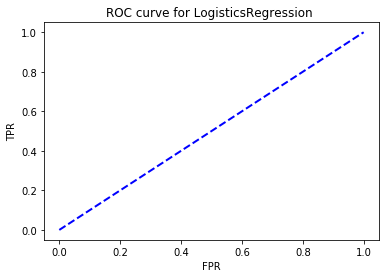

In [687]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_pred,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for LogisticsRegression ')
plt.show()

In [688]:
# Logistic Regression
#lr=LogisticRegression(C=10,tol=0.0001,random_state=51,n_jobs=-1,solver='liblinear',class_weight='balanced')
lr=LogisticRegression(penalty='l1',random_state=42,solver='liblinear',class_weight='balanced')
lr.fit(x_train,y_train)
# Linear Regression
y_test_pred_lr=lr.predict(x_test)
print(classification_report(y_test,y_test_pred_lr))
print('ROC-AUC:',round(roc_auc_score(y_test,y_test_pred_lr)*100,4))
print("Model Accuracy is : ",metrics.accuracy_score(y_test, y_test_pred_lr)*100)

              precision    recall  f1-score   support

           0       0.82      0.39      0.53       235
           1       0.31      0.76      0.44        85

    accuracy                           0.49       320
   macro avg       0.57      0.58      0.49       320
weighted avg       0.69      0.49      0.51       320

ROC-AUC: 57.8098
Model Accuracy is :  49.0625


Confusion Matrix values in percentage
****************************************


Text(33,0.5,'Predicted Label')

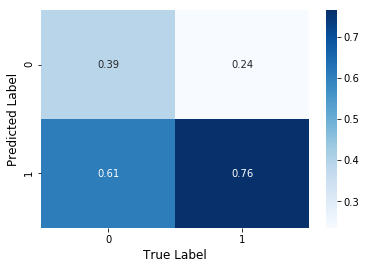

In [689]:
# Confusion Matrix
print(f"Confusion Matrix values in percentage\n{40 * '*'}")
cm = confusion_matrix(y_test, y_test_pred_lr).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

### KNN Classification

In [690]:
# KNN Classification with 5 neighbors
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(x_train, y_train)
y_pred_knn = knn.predict(x_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_test, y_pred_knn)*100)

Model Accuracy is :  71.5625


[[221  14]
 [ 77   8]]


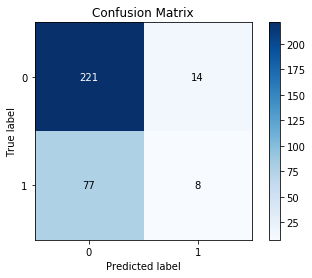

In [691]:
# Confusion Matrix for KNN classification
print(confusion_matrix(y_test, y_pred_knn))
skplt.metrics.plot_confusion_matrix(y_test, y_pred_knn);

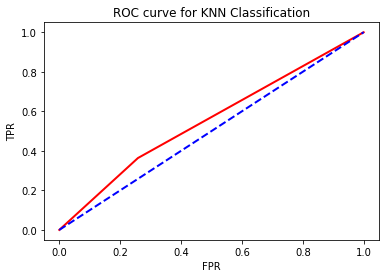

In [692]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(y_pred_knn,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for KNN Classification')
plt.show()

### K=1 through K=25 and record testing accuracy

In [693]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred_knn = knn.predict(x_test)
    scores.append(metrics.accuracy_score(y_test, y_pred_knn)*100)
print("Model Accuracy for different K values are :")
print(scores)

Model Accuracy for different K values are :
[63.125, 71.875, 68.75, 74.375, 71.5625, 71.875, 71.25, 72.1875, 72.5, 73.125, 73.75, 73.75, 73.75, 72.8125, 72.5, 72.5, 72.5, 73.125, 73.125, 73.4375, 73.4375, 73.4375, 73.4375, 73.4375, 73.4375]


plot the relationship between K and testing accuracy


Text(0,0.5,'Testing Accuracy')

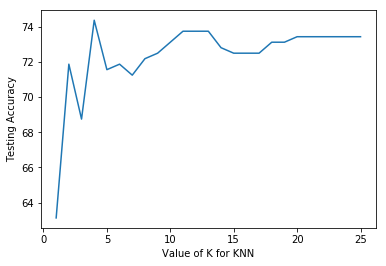

In [694]:
# plot the relationship between K and testing accuracy
print('plot the relationship between K and testing accuracy')
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

### Naive Bayes Classifier

In [695]:
# Naive Bayes Classification
naive = GaussianNB()
# Train the model
naive.fit(x_train, y_train)
# Make predictions and evalute
naive_pred = naive.predict(x_test)
print("Model Accuracy is : ", metrics.accuracy_score(y_test, naive_pred)*100)

Model Accuracy is :  71.875


[[229   6]
 [ 84   1]]


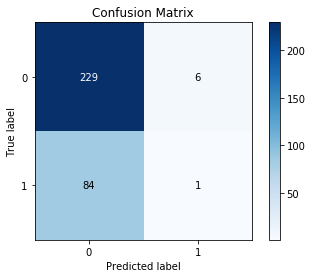

In [696]:
# Confusion Matrix for Naive Bayes
print(confusion_matrix(y_test, naive_pred))
skplt.metrics.plot_confusion_matrix(y_test, naive_pred);

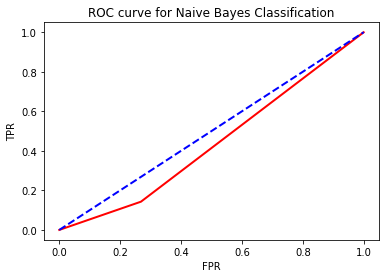

In [697]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(naive_pred,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Naive Bayes Classification')
plt.show()

### Gradient Boosting Classification

In [698]:
# # Gradient Boosting Classification
gb = XGBClassifier()
# Train the model
gb.fit(x_train, y_train)
# Make predictions and evalute
gb_pred = gb.predict(x_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_test, gb_pred)*100)


Model Accuracy is :  74.0625


[[223  12]
 [ 71  14]]


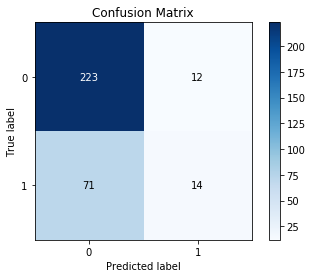

In [699]:
# Confusion matrix for Gradiant Boosting Classification
print(confusion_matrix(y_test, gb_pred))
skplt.metrics.plot_confusion_matrix(y_test, gb_pred);

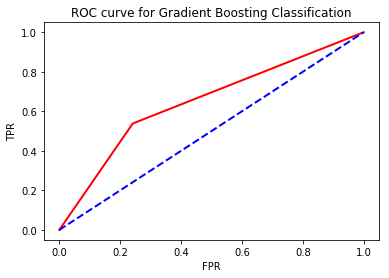

In [700]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(gb_pred,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Gradient Boosting Classification')
plt.show()

### Random Forest Classifier

In [701]:
# Random Forest
rfc=RandomForestClassifier(n_estimators=150,max_depth=14,max_leaf_nodes= None, 
                           min_impurity_decrease= 1e-05, min_samples_leaf= 20,
                           class_weight='balanced',n_jobs=-1,random_state=51)
rfc.fit(x_train,y_train)
# Make predictions and evalute
rfc_pred = rfc.predict(x_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_test, rfc_pred)*100)


Model Accuracy is :  74.6875


[[210  25]
 [ 56  29]]


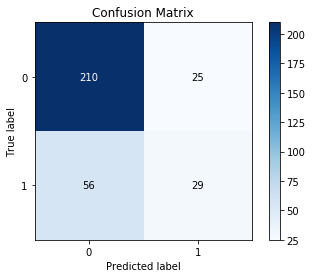

In [702]:
# Confusion matrix for Random Forest Classification
print(confusion_matrix(y_test, rfc_pred))
skplt.metrics.plot_confusion_matrix(y_test, rfc_pred);

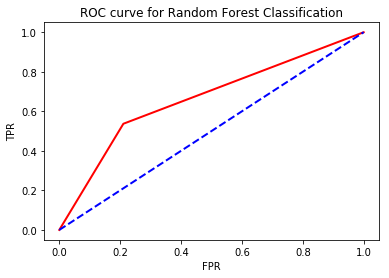

In [703]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(rfc_pred,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Random Forest Classification')
plt.show()

### LGBM Classifier

In [704]:
# LGBM Classifier
lgb=LGBMClassifier(random_state=51, class_weight= {0: 1, 1: 4}, colsample_bytree=1, max_depth=7,
 min_child_samples=20, min_split_gain=0, n_estimators=100, reg_alpha=4)
lgb.fit(x_train,y_train)
# Make predictions and evalute
lgb_pred = lgb.predict(x_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_test, lgb_pred)*100)

Model Accuracy is :  64.375


### Decision Tree Classifier

In [705]:
#Decision Tree
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=5,random_state=42)
dt.fit(x_train,y_train)
# Make predictions and evalute
dt_pred = dt.predict(x_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_test, dt_pred)*100)

Model Accuracy is :  63.74999999999999


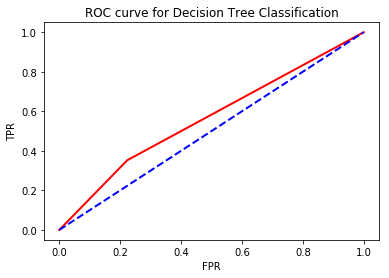

In [706]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(dt_pred,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve for Decision Tree Classification')
plt.show()

[[167  68]
 [ 48  37]]


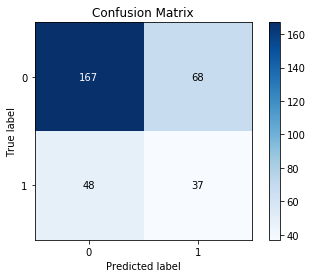

In [707]:
print(confusion_matrix(y_test, dt_pred))
skplt.metrics.plot_confusion_matrix(y_test, dt_pred);

### SVM (Support Vector Machine Classifier)

In [708]:
#SVM Classification
from sklearn import svm
#Create a svm Classifier
#sv = svm.SVC(kernel='linear') # Linear Kernel
#sv = svm.SVC(kernel='poly') # Plonomial Kernel
sv = svm.SVC(kernel='rbf') # Linear Kernel
#sv = svm.SVC(kernel='sigmoid') # Linear Kernel
#Train the model using the training sets
sv.fit(x_train, y_train)
# Make predictions and evalute
sv_pred = sv.predict(x_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_test, sv_pred)*100)

Model Accuracy is :  73.4375


[[235   0]
 [ 85   0]]


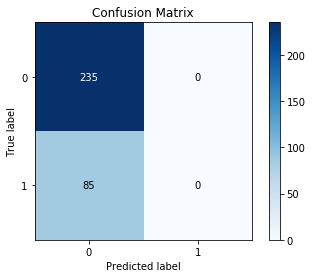

In [709]:
print(confusion_matrix(y_test, sv_pred))
skplt.metrics.plot_confusion_matrix(y_test, sv_pred);

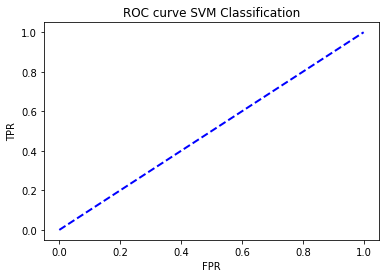

In [710]:
##Computing false and true positive rates
fpr, tpr,_=roc_curve(sv_pred,y_test,drop_intermediate=False)
plt.figure()
##Adding the ROC
plt.plot(fpr, tpr, color='red',
 lw=2, label='ROC curve')
##Random FPR and TPR
plt.plot([0, 1], [0, 1], color='blue', lw=2, linestyle='--')
##Title and label
plt.xlabel('FPR')
plt.ylabel('TPR')
plt.title('ROC curve SVM Classification')
plt.show()

### Create a DataFrame for all the classification models and its accuracy value

In [711]:
data = {'LogisticRegression':  metrics.accuracy_score(y_test, y_pred)*100,
        'KNN Classification': metrics.accuracy_score(y_test, y_pred_knn)*100,
        'Naive Bayes': metrics.accuracy_score(y_test, naive_pred)*100,
        'XGBClassifier': metrics.accuracy_score(y_test, gb_pred)*100,
        'Random Forest': metrics.accuracy_score(y_test, rfc_pred)*100,
        'LGBMClassifier': metrics.accuracy_score(y_test, lgb_pred)*100,
        'Decision Tree': metrics.accuracy_score(y_test, dt_pred)*100,
        'SVM': metrics.accuracy_score(y_test, sv_pred)*100,
        }

model_accuracy = pd.DataFrame.from_dict(data,orient = 'index')
model_accuracy.columns=['Model Accuracy']
print(f"Classification Models wih Accuracy Scores in % \n{50 * '*'}")
print(model_accuracy)

Classification Models wih Accuracy Scores in % 
**************************************************
                    Model Accuracy
LogisticRegression         73.4375
KNN Classification         73.4375
Naive Bayes                71.8750
XGBClassifier              74.0625
Random Forest              74.6875
LGBMClassifier             64.3750
Decision Tree              63.7500
SVM                        73.4375


#### ======================================================================##
#### Most of the classification models are showing accuracy of 73%. Now create a balace dataset and apply all above classification models and check the accuracy. In the Data set Minority class is "Defaulter" and the Majority Class is "Non-Defaulter".so we up-sample the minority class.

*Up-sampling is the process of randomly duplicating observations from the minority class in order to reinforce its signal.*

***We create a new DataFrame with an up-sampled minority class. Here are the steps:***

*First, we'll separate observations from each class into different DataFrames.<br>
Next, we'll resample the minority class with replacement, setting the number of samples to match that of the majority class.<br>
Finally, we'll combine the up-sampled minority class DataFrame with the original majority class DataFrame.*

In [712]:
from sklearn.utils import resample
# Separate majority and minority classes
df_majority = data_train[data_train['First Payment Default']==0]
df_minority = data_train[data_train['First Payment Default']==1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=1175,   # to match majority class
                                 random_state=123) # reproducible results
 
# # Combine majority class with upsampled minority class
#df_upsampled = pd.DataFrame(pd.concat([df_majority, df_minority_upsampled]))
df_upsampled = pd.concat([df_majority, df_minority_upsampled])
# # Display new class counts
df_upsampled['First Payment Default'].value_counts()

1    1175
0    1175
Name: First Payment Default, dtype: int64

In [713]:
df_majority['First Payment Default'].value_counts()

0    1175
Name: First Payment Default, dtype: int64

**Now the Majority and Minority Classes are balanced.Now use this new DataFrame for Model Prediction**

In [714]:
# Randomly Displays 5 instances
df_upsampled.sample(5)

,State,Paycheck Net Income,Rent or Own,Months at Residence,Bank Account Months,Pay Cycle,Loan Amount,First Payment Default,loan_percent
702,1,2000,1,12,12,2,235.30,0,0.117650
1222,1,811,0,690,36,3,264.71,0,0.326400
417,0,2500,1,12,6,3,642.87,1,0.257148
1594,1,2500,0,12,6,2,117.65,1,0.047060
1008,1,1200,1,71,30,1,300.00,0,0.250000


In [715]:
df_upsampled.shape

(2350, 9)

In [716]:
#Patition Data sets into attributes and lebels
x_us=df_upsampled.drop(['First Payment Default'],axis=1)
y_us=df_upsampled['First Payment Default']

#Prepare Data set for training and testing
x_us_train,x_us_test,y_us_train,y_us_test=train_test_split(x_us,y_us,test_size=0.20,random_state=42,stratify=y_us)

In [717]:
#Print the shape of the training and Test Data sets after partition
print(f"shape of the training and Test up-sampled Data sets after partition:\n{40 * '*'}")
print("Shape of x_us_train:", x_us_train.shape,"\n")
print("Shape of x_us_test:", x_us_test.shape,"\n")
print("Shape of y_us_train:", y_us_train.shape,"\n")
print("Shape of y_us_test:", y_us_test.shape)

shape of the training and Test up-sampled Data sets after partition:
****************************************
Shape of x_us_train: (1880, 8) 

Shape of x_us_test: (470, 8) 

Shape of y_us_train: (1880,) 

Shape of y_us_test: (470,)


In [718]:
#Scaling
scaler=RobustScaler()
x_us_train=scaler.fit_transform(x_us_train)
x_us_train=pd.DataFrame(x_us_train,columns=x_us.columns)

x_us_test=scaler.fit_transform(x_us_test)
x_us_test=pd.DataFrame(x_us_test,columns=x_us.columns)

#### Now the classes are balanced.

In [719]:
y_us.value_counts(normalize=True)

1    0.5
0    0.5
Name: First Payment Default, dtype: float64

In [720]:
y_us_train.value_counts()

1    940
0    940
Name: First Payment Default, dtype: int64

### Logistic Regression with default parameters and with parameters 

In [721]:
# instantiate the model (using the default parameters)
logreg_us = LogisticRegression()
# fit the model with data
logreg_us.fit(x_us_train, y_us_train)

# store the predicted response values
y_us_pred = logreg_us.predict(x_us_test)

# check how many predictions were generated
print("No of predictions were generated",len(y_us_pred))

print("Model Accuracy is : ", metrics.accuracy_score(y_us_test, y_us_pred)*100)

No of predictions were generated 470
Model Accuracy is :  59.361702127659576


In [722]:
# Logistic Regression

lr_us=LogisticRegression(penalty='l1',random_state=42,solver='liblinear')
lr_us.fit(x_us_train,y_us_train)
# Linear Regression
lr_us_pred=lr_us.predict(x_us_test)
print(classification_report(y_us_test,lr_us_pred))
print('ROC-AUC:',round(roc_auc_score(y_us_test,lr_us_pred)*100,4))
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, lr_us_pred)*100)

              precision    recall  f1-score   support

           0       0.58      0.69      0.63       235
           1       0.61      0.49      0.55       235

    accuracy                           0.59       470
   macro avg       0.60      0.59      0.59       470
weighted avg       0.60      0.59      0.59       470

ROC-AUC: 59.1489
Model Accuracy is :  59.148936170212764


Text(33,0.5,'Predicted Label')

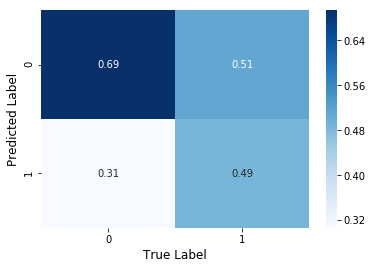

In [723]:
# Confusion Matrix
cm = confusion_matrix(y_us_test, lr_us_pred).T
cm = cm.astype('float')/cm.sum(axis=0)
ax = sns.heatmap(cm, annot=True, cmap='Blues');
ax.set_xlabel('True Label',size=12)
ax.set_ylabel('Predicted Label',size=12)

### Random Forest Classification

In [724]:
# Random Forest
rfc_us=RandomForestClassifier(n_estimators=150,max_depth=14,max_leaf_nodes= None, 
                           min_impurity_decrease= 1e-05, min_samples_leaf= 200,
                           class_weight='balanced',n_jobs=-1,random_state=51)
rfc_us.fit(x_us_train,y_us_train)
# # Make predictions and evalute
rfc_us_pred = rfc_us.predict(x_us_test)
print(classification_report(y_us_test,rfc_us_pred))
print('ROC-AUC:',round(roc_auc_score(y_us_test,rfc_us_pred)*100,4))
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, rfc_us_pred)*100)

              precision    recall  f1-score   support

           0       0.59      0.72      0.65       235
           1       0.65      0.51      0.57       235

    accuracy                           0.61       470
   macro avg       0.62      0.61      0.61       470
weighted avg       0.62      0.61      0.61       470

ROC-AUC: 61.4894
Model Accuracy is :  61.48936170212767


[[170  65]
 [116 119]]


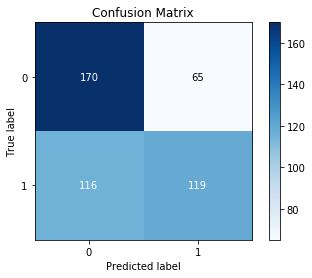

In [725]:
# Confusion Matrix for Random Forest
print(confusion_matrix(y_us_test, rfc_us_pred))
skplt.metrics.plot_confusion_matrix(y_us_test, rfc_us_pred);

### KNN Classification

In [726]:
#KNN
knn_us = KNeighborsClassifier(n_neighbors=5)
knn_us.fit(x_us_train, y_us_train)
knn_us_pred = knn_us.predict(x_us_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, knn_us_pred)*100)

Model Accuracy is :  64.25531914893618


[[148  87]
 [ 81 154]]


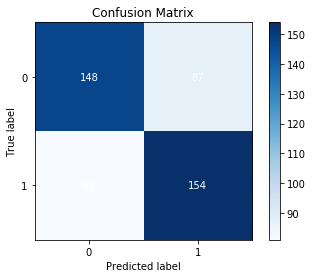

In [727]:
# Confusion Matrix for KNN Classification
print(confusion_matrix(y_us_test, knn_us_pred))
skplt.metrics.plot_confusion_matrix(y_us_test, knn_us_pred);

### KNN Classification with Multiple K values

In [728]:
# try K=1 through K=25 and record testing accuracy
k_range = range(1, 26)

# We can create Python dictionary using [] or dict()
scores = []

# We use a loop through the range 1 to 26
# We append the scores in the dictionary
for k in k_range:
    knn_usp = KNeighborsClassifier(n_neighbors=k)
    knn_usp.fit(x_us_train, y_us_train)
    knn_usp_pred = knn_usp.predict(x_us_test)
    scores.append(metrics.accuracy_score(y_us_test, knn_usp_pred)*100)
print("Model Accuracy for different K values are :")
print(scores)

Model Accuracy for different K values are :
[64.8936170212766, 62.76595744680851, 65.74468085106383, 65.31914893617021, 64.25531914893618, 63.40425531914894, 61.27659574468085, 59.148936170212764, 59.57446808510638, 60.21276595744681, 58.723404255319146, 60.42553191489362, 60.63829787234043, 58.08510638297872, 59.148936170212764, 58.29787234042553, 58.08510638297872, 56.80851063829787, 57.446808510638306, 59.148936170212764, 59.148936170212764, 59.787234042553195, 60.21276595744681, 60.851063829787236, 59.361702127659576]


### SVM (Support Vector Machine Classification)

In [729]:
#SVM
#Create a svm Classifier
sv_us = svm.SVC(kernel='linear') # Linear Kernel
#sv_us = svm.SVC(kernel='poly') # Plonomial Kernel
#sv_us = svm.SVC(kernel='rbf') # Linear Kernel
#sv_us = svm.SVC(kernel='sigmoid') # Linear Kernel
#Train the model using the training sets
sv_us.fit(x_us_train, y_us_train)
# Make predictions and evalute
sv_us_pred = sv_us.predict(x_us_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, sv_us_pred)*100)

Model Accuracy is :  56.80851063829787


[[172  63]
 [140  95]]


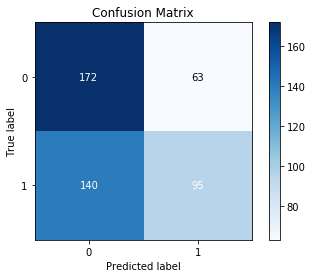

In [730]:
# Confusion Matrix for SVM Classification
print(confusion_matrix(y_us_test, sv_us_pred))
skplt.metrics.plot_confusion_matrix(y_us_test, sv_us_pred);

### NAIVE BAYES Classification

In [731]:
# NAIVE BAYES Classification
naive_us = GaussianNB()
# Train the model
naive_us.fit(x_us_train, y_us_train)
# Make predictions and evalute
naive_us_pred = naive_us.predict(x_us_test)
print("Model Accuracy is : ", metrics.accuracy_score(y_us_test, naive_us_pred)*100)

Model Accuracy is :  53.61702127659574


### Gradient Boosting Classification

In [732]:
# Gradient Boosting Classification
gb_us = XGBClassifier()
# Train the model
gb_us.fit(x_us_train, y_us_train)
# Make predictions and evalute
gb_us_pred = gb_us.predict(x_us_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, gb_us_pred)*100)

Model Accuracy is :  62.12765957446808


[[199  36]
 [142  93]]


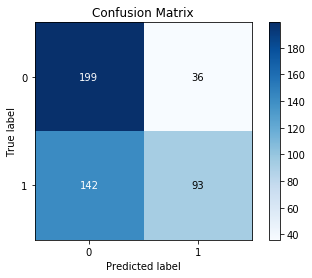

In [733]:
# Confusion Matrix for SVM Classification
print(confusion_matrix(y_us_test, gb_us_pred))
skplt.metrics.plot_confusion_matrix(y_us_test, gb_us_pred);

### LGBMClassifier

In [734]:
#LGBM
lgb_us=LGBMClassifier(random_state=51, class_weight= {0: 1, 1: 4}, colsample_bytree=1, max_depth=7,
 min_child_samples=20, min_split_gain=0, n_estimators=100, reg_alpha=13)
lgb_us.fit(x_us_train,y_us_train)
# Make predictions and evalute
lgb_us_pred = lgb.predict(x_us_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, lgb_us_pred)*100)

Model Accuracy is :  55.53191489361702


### Decision Tree Classifiation

In [735]:
#Decision Tree
dt_us = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,random_state=42)
dt_us.fit(x_us_train,y_us_train)
# Make predictions and evalute
dt_us_pred = dt_us.predict(x_us_test)
print("Model Accuracy is : ",metrics.accuracy_score(y_us_test, dt_us_pred)*100)

Model Accuracy is :  56.80851063829787


[[215  20]
 [183  52]]


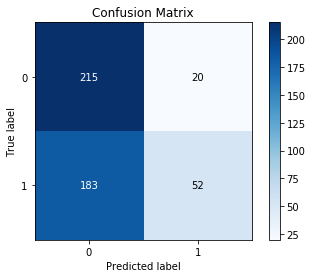

In [736]:
# Confusion Matrix for Decision Tree Classification
print(confusion_matrix(y_us_test, dt_us_pred))
skplt.metrics.plot_confusion_matrix(y_us_test, dt_us_pred);

### Consolidate the Model Accuracies

In [737]:
data_us = {'LogisticRegression':  metrics.accuracy_score(y_us_test, lr_us_pred)*100,
        'KNN Classification': metrics.accuracy_score(y_us_test, knn_us_pred)*100,
        'Naive Bayes': metrics.accuracy_score(y_us_test, naive_us_pred)*100,
        'XGBClassifier': metrics.accuracy_score(y_us_test, gb_us_pred)*100,
        'Random Forest': metrics.accuracy_score(y_us_test, rfc_us_pred)*100,
        'LGBMClassifier': metrics.accuracy_score(y_us_test, lgb_us_pred)*100,
        'Decision Tree': metrics.accuracy_score(y_us_test, dt_us_pred)*100,
        'SVM': metrics.accuracy_score(y_us_test, sv_us_pred)*100,
        }

model_us_accuracy = pd.DataFrame.from_dict(data_us,orient = 'index')
model_us_accuracy.columns=['Model Accuracy']
print(f"Classification Models wih Accuracy Scores in % after applying Upsampling Technique\n{70 * '*'}")
print(model_us_accuracy)

Classification Models wih Accuracy Scores in % after applying Upsampling Technique
**********************************************************************
                    Model Accuracy
LogisticRegression       59.148936
KNN Classification       64.255319
Naive Bayes              53.617021
XGBClassifier            62.127660
Random Forest            61.489362
LGBMClassifier           55.531915
Decision Tree            56.808511
SVM                      56.808511


#### There is no significant difference in model score after applying Upsampling Technique.
#### Now we will apply Cross Validation Technique to trained the Classification Models with More Datasets
> **K-Fold Cross Validation<br>**
*It works by splitting the dataset into k-parts (e.g. k=5 or k=10). Each split of the data is called a fold. The algorithm is trained on k-1 folds with one held back and tested on the held back fold. This is repeated so that each fold of the dataset is given a chance to be the held back test set.<br>After running cross validation you end up with k different performance scores that you can summarize using a mean and a standard deviation.*

### Classification Models using K-Fold Cross Valdation Technique

In [738]:
# search for an optimal value of K for KNN

# range of k we want to try
k_range = range(1, 31)
# empty list to store scores
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, X, Y, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean()*100)


print(k_scores)

[63.0, 72.3125, 69.25000000000001, 72.375, 70.3125, 73.0625, 71.5625, 73.81249999999999, 72.74999999999999, 74.1875, 73.6875, 74.49999999999999, 74.125, 74.8125, 74.1875, 75.1875, 74.99999999999999, 75.25, 74.75, 75.25, 75.0, 75.37499999999999, 75.125, 75.125, 75.0, 75.0625, 75.0, 74.87499999999999, 74.62500000000001, 74.8125]


### Logistics Regression with K-Fold Validation

In [739]:
# Logistic Regression with K-Fold Cross Valiation
from sklearn.model_selection import cross_val_predict
lg_kfld=LogisticRegression()
lg_scores_kfld = cross_val_score(lg_kfld, x_train, y_train, cv=10, scoring='accuracy')
lg_predicted = cross_val_predict(lg_kfld, x_test,y_test, cv=10)
print(lg_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (lg_scores_kfld.mean()*100.0, lg_scores_kfld.std()*100.0),"\n")
print(metrics.classification_report(y_test, lg_predicted))

[72.65625 74.21875 73.4375  73.4375  73.4375  73.4375  73.4375  72.65625
 71.875   73.4375 ] 

Mean Accuracy and Standard Deviation: 73.203% (0.610%) 

              precision    recall  f1-score   support

           0       0.74      1.00      0.85       235
           1       1.00      0.02      0.05        85

    accuracy                           0.74       320
   macro avg       0.87      0.51      0.45       320
weighted avg       0.81      0.74      0.64       320



[[235   0]
 [ 83   2]]


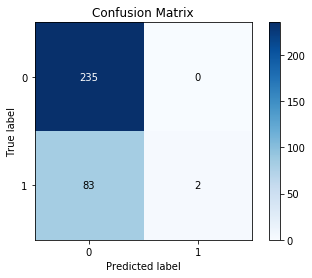

In [740]:
# Confusion Matrix for Logistics Regression with F-Fold Cross validation
print(confusion_matrix(y_test, lg_predicted))
skplt.metrics.plot_confusion_matrix(y_test, lg_predicted);

### KNN with K-Fold Cross Validation

In [741]:
#KNN
knn_kfld = KNeighborsClassifier(n_neighbors=10)
knn_scores_kfld = cross_val_score(knn_kfld, x_train, y_train, cv=10, scoring='accuracy')
knn_predicted = cross_val_predict(knn_kfld, x_test,y_test, cv=10)
print(knn_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (knn_scores_kfld.mean()*100.0, knn_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, knn_predicted))

[71.875   73.4375  70.3125  77.34375 74.21875 70.3125  71.09375 73.4375
 71.875   72.65625] 

Mean Accuracy and Standard Deviation: 72.656% (2.007%)
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       235
           1       0.47      0.09      0.16        85

    accuracy                           0.73       320
   macro avg       0.61      0.53      0.50       320
weighted avg       0.67      0.73      0.66       320



[[226   9]
 [ 77   8]]


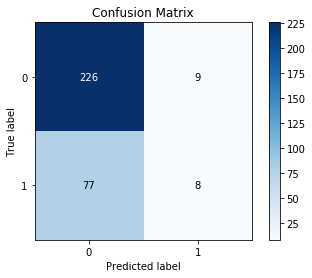

In [742]:
# Confusion Matrix for KNN with F-Fold Cross validation
print(confusion_matrix(y_test, knn_predicted))
skplt.metrics.plot_confusion_matrix(y_test, knn_predicted);

### Naive Bayes Classifier

In [743]:
# Niave Bayes
naive_kfld = GaussianNB()
naive_scores_kfld = cross_val_score(naive_kfld, x_train, y_train, cv=10, scoring='accuracy')
naive_predicted = cross_val_predict(naive_kfld, x_test,y_test, cv=10)
print(naive_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (naive_scores_kfld.mean()*100.0, naive_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, naive_predicted))

[71.875   68.75    71.875   73.4375  71.09375 69.53125 77.34375 71.09375
 71.875   75.78125] 

Mean Accuracy and Standard Deviation: 72.266% (2.501%)
              precision    recall  f1-score   support

           0       0.75      0.81      0.78       235
           1       0.32      0.25      0.28        85

    accuracy                           0.66       320
   macro avg       0.54      0.53      0.53       320
weighted avg       0.64      0.66      0.65       320



[[191  44]
 [ 64  21]]


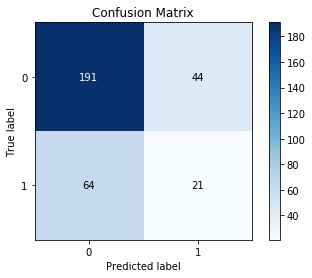

In [744]:
# Confusion Matrix for Niave Bayes with F-Fold Cross validation
print(confusion_matrix(y_test, naive_predicted))
skplt.metrics.plot_confusion_matrix(y_test, naive_predicted);

### Gradient Boosting Classification

In [745]:
# Gradient Boosting Classification
gb_kfld = XGBClassifier()
gb_scores_kfld = cross_val_score(gb_kfld, x_train, y_train, cv=10, scoring='accuracy')
gb_predicted = cross_val_predict(gb_kfld, x_test,y_test, cv=10)
print(gb_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (gb_scores_kfld.mean()*100.0, gb_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, gb_predicted))

[70.3125  76.5625  69.53125 71.875   73.4375  67.96875 65.625   73.4375
 67.1875  65.625  ] 

Mean Accuracy and Standard Deviation: 70.156% (3.473%)
              precision    recall  f1-score   support

           0       0.79      0.80      0.79       235
           1       0.43      0.41      0.42        85

    accuracy                           0.70       320
   macro avg       0.61      0.61      0.61       320
weighted avg       0.69      0.70      0.70       320



[[188  47]
 [ 50  35]]


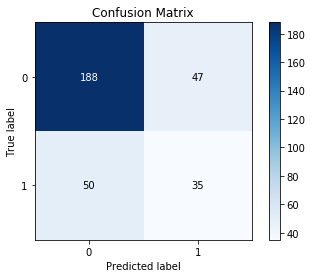

In [746]:
# Confusion Matrix for Gradient Boosting Classification with F-Fold Cross validation
print(confusion_matrix(y_test, gb_predicted))
skplt.metrics.plot_confusion_matrix(y_test, gb_predicted);

### Random Forest Classification

In [747]:
# Random Forest Classification with K-Fold Cross Validation
rfc_kfld=RandomForestClassifier(n_estimators=150,max_depth=14,max_leaf_nodes= None, 
                           min_impurity_decrease= 1e-05, min_samples_leaf= 20,
                           class_weight='balanced',n_jobs=-1,random_state=51)
rfc_scores_kfld = cross_val_score(rfc_kfld, x_train, y_train, cv=10, scoring='accuracy')
rfc_predicted = cross_val_predict(rfc_kfld, x_test,y_test, cv=10)
print(rfc_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (rfc_scores_kfld.mean()*100.0, rfc_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, rfc_predicted))

[67.1875  61.71875 65.625   62.5     65.625   64.84375 64.0625  66.40625
 65.625   60.15625] 

Mean Accuracy and Standard Deviation: 64.375% (2.131%)
              precision    recall  f1-score   support

           0       0.80      0.60      0.68       235
           1       0.35      0.60      0.44        85

    accuracy                           0.60       320
   macro avg       0.58      0.60      0.56       320
weighted avg       0.68      0.60      0.62       320



[[140  95]
 [ 34  51]]


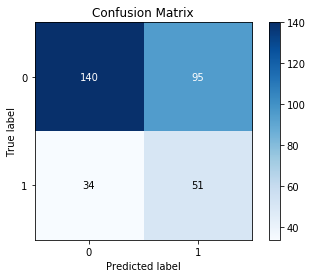

In [748]:
# Confusion Matrix for Random forest Classification with F-Fold Cross validation
print(confusion_matrix(y_test, rfc_predicted))
skplt.metrics.plot_confusion_matrix(y_test, rfc_predicted);

### SVM Classification

In [749]:
#SVM Classification
#sv_kfld = svm.SVC(kernel='linear') # Linear Kernel
#sv_kfld = svm.SVC(kernel='poly') # Plonomial Kernel
sv_kfld = svm.SVC(kernel='rbf') # Linear Kernel
#sv_kfld = svm.SVC(kernel='sigmoid') # Linear Kernel
sv_scores_kfld = cross_val_score(sv_kfld, x_train, y_train, cv=10, scoring='accuracy')
sv_predicted = cross_val_predict(sv_kfld, x_test,y_test, cv=10)
print(sv_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (sv_scores_kfld.mean()*100.0, sv_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, sv_predicted))

[73.4375  75.78125 71.09375 76.5625  74.21875 74.21875 75.78125 75.
 75.      74.21875] 

Mean Accuracy and Standard Deviation: 74.531% (1.449%)
              precision    recall  f1-score   support

           0       0.75      0.99      0.85       235
           1       0.78      0.08      0.15        85

    accuracy                           0.75       320
   macro avg       0.76      0.54      0.50       320
weighted avg       0.76      0.75      0.67       320



[[233   2]
 [ 78   7]]


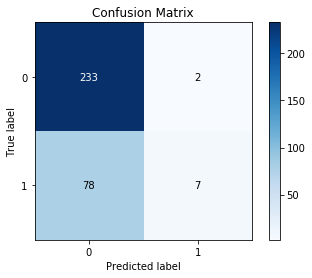

In [750]:
# Confusion Matrix for SVM Classification with F-Fold Cross validation
print(confusion_matrix(y_test, sv_predicted))
skplt.metrics.plot_confusion_matrix(y_test, sv_predicted);

### LGBM Classification

In [751]:
#LGBM
lgb_kfld=LGBMClassifier(random_state=51, class_weight= {0: 1, 1: 4}, colsample_bytree=1, max_depth=7,
 min_child_samples=20, min_split_gain=0, n_estimators=100, reg_alpha=4)
lgb_scores_kfld = cross_val_score(lgb_kfld, x_train, y_train, cv=10, scoring='accuracy')
lgb_predicted = cross_val_predict(lgb_kfld, x_test,y_test, cv=10)
print(lgb_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (lgb_scores_kfld.mean()*100.0, lgb_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, lgb_predicted))

[56.25    58.59375 61.71875 60.9375  51.5625  60.15625 57.8125  55.46875
 52.34375 51.5625 ] 

Mean Accuracy and Standard Deviation: 56.641% (3.652%)
              precision    recall  f1-score   support

           0       0.84      0.55      0.67       235
           1       0.36      0.71      0.48        85

    accuracy                           0.59       320
   macro avg       0.60      0.63      0.57       320
weighted avg       0.71      0.59      0.62       320



### Decision Tree Classification

In [752]:
#Decision Tree
dt_kfld = DecisionTreeClassifier(class_weight='balanced', criterion='gini', max_depth=4,random_state=42)
dt_scores_kfld = cross_val_score(dt_kfld, x_train, y_train, cv=10, scoring='accuracy')
dt_predicted = cross_val_predict(dt_kfld, x_test,y_test, cv=10)
print(dt_scores_kfld*100.0,"\n")
print("Mean Accuracy and Standard Deviation: %.3f%% (%.3f%%)" % (dt_scores_kfld.mean()*100.0, dt_scores_kfld.std()*100.0))
print(metrics.classification_report(y_test, dt_predicted))

[50.      67.96875 67.1875  70.3125  65.625   52.34375 47.65625 54.6875
 70.3125  49.21875] 

Mean Accuracy and Standard Deviation: 59.531% (9.015%)
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       235
           1       0.33      0.61      0.43        85

    accuracy                           0.57       320
   macro avg       0.56      0.58      0.54       320
weighted avg       0.67      0.57      0.59       320



### Consilidate Classification Models Mean Accuracy Value after Applying K-Fold Cross Validation

In [753]:
data_kfld = {'LogisticRegression':  lg_scores_kfld.mean()*100.0,
        'KNN Classification': knn_scores_kfld.mean()*100.0,
        'Naive Bayes': naive_scores_kfld.mean()*100.0,
        'XGBClassifier': gb_scores_kfld.mean()*100.0,
        'Random Forest': rfc_scores_kfld.mean()*100.0,
        'LGBMClassifier': lgb_scores_kfld.mean()*100.0,
        'Decision Tree': dt_scores_kfld.mean()*100.0,
        'SVM': sv_scores_kfld.mean()*100.0,
        }

model_kfld_accuracy = pd.DataFrame.from_dict(data_kfld,orient = 'index')
model_kfld_accuracy.columns=['Model Accuracy']
print(f"Classification Models Mean Accuracy Scores in % after applying K-Fold Cross Validation Technique\n{70 * '*'}")
print(model_kfld_accuracy)

Classification Models Mean Accuracy Scores in % after applying K-Fold Cross Validation Technique
**********************************************************************
                    Model Accuracy
LogisticRegression       73.203125
KNN Classification       72.656250
Naive Bayes              72.265625
XGBClassifier            70.156250
Random Forest            64.375000
LGBMClassifier           56.640625
Decision Tree            59.531250
SVM                      74.531250


#### After checking all the Model Accuracy and Confusion Matrix, the approxmate accuracy is 75%.<br>Compare to other models KNN and Random Forest prediction is quiet impressive as the False Negative value(outcome where the model incorrectly predicts the negative class or defaulter) is less compare to KNN classification.We can consider Random Forest for defaulter prediction 


### Creating a CSV File with Actual and Predicted Values for Test Dataset

In [754]:
# Load the Train Data set to pandas data frame
predictedDf=pd.read_csv('C:\\Users\\Anup\\Desktop\\DataSet\\newdata\\data.csv',sep=',')
#Patition Data sets into attributes and lebels

X_PredDf=predictedDf.drop(['First Payment Default'],axis=1)
Y_PredDf=predictedDf['First Payment Default']

#Prepare Data set for training and testing with 80 and 20 percentage
x_train_pred,x_test_pred,y_train_pred,y_test_pred=train_test_split(X_PredDf,Y_PredDf,test_size=0.20,random_state=42,stratify=Y)

In [755]:
# Creating a New Data Set with Actual and Predicted Values
FinalDf=pd.DataFrame(x_test_pred) # All the Features of Data Set
FinalDf['First Payment Default']= y_test_pred #Actual Prediction
FinalDf['Model Prediction']= rfc_pred  # Predicted by the Model

In [756]:
FinalDf['Model Prediction']= FinalDf['Model Prediction'].astype('bool')

In [757]:
# Actual Defaulter an Non Defaulter Count(True-Defaulter,False-Non-Defaulter)
FinalDf['First Payment Default'].value_counts()

False    235
True      85
Name: First Payment Default, dtype: int64

In [759]:
# Predicted Defaulter an Non Defaulter Count(True-Defaulter,False-Non-Defaulter)
FinalDf['Model Prediction'].value_counts()

False    266
True      54
Name: Model Prediction, dtype: int64

In [760]:
# Export Pandas DataFrame to a CSV File
FinalDf.to_csv(r'C:\\Users\\Anup\\Desktop\\DataSet\\newdata\\Final_Loan_Defaulter.csv', index = False)

### Concusion:

*In Loan Defaulter Prediction Model, I considered multiple classification Techniques. Among all these classification models, Random Forest prediction is quiet impessive.In this scenario, I have considered 1600 instances with 9 features(8 existing feature and 1 derived feature-Loan Percentage which was derived from 'Loan Amount' and 'Paycheck Net Income' ).The accuracy percent comes to be 75%.<br><br>I also tried Up-Sampling and Cross Validation Technique to address instability of data. However, Could not figure out any noticeable result.<br>I felt would it have been a little bit more feature inclusive to the data set and more volume of training data, model accuracy could have been spiked up a bit.<br><br>Hence I could conclude ramdom forest on existing traning data is approxmate to the best fit with 75% accuracy*